## Sequential

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [3]:
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.25784796, -0.27718505, -0.06246896, -0.06468587,  0.2335949 ,
          0.2018162 ,  0.13724864,  0.09418276,  0.05318752,  0.07975715,
         -0.14891678,  0.07843965, -0.25094333,  0.08337182, -0.23985785,
         -0.22569197, -0.20672974, -0.28174385, -0.21314453,  0.21104968,
         -0.19598946,  0.14433429, -0.04330575, -0.01368722,  0.06622475,
          0.20034957, -0.00700882,  0.15545458,  0.19242638,  0.1701814 ,
          0.09690079,  0.19083476,  0.11120445,  0.10309026,  0.29285866,
          0.29555738, -0.19505338, -0.25342864,  0.03018546, -0.24713522,
         -0.22488204, -0.05998814,  0.28150558,  0.22464782,  0.23460513,
          0.06183219,  0.15350726,  0.24952453,  0.1141257 ,  0.26060838,
          0.29741192,  0.09346178,  0.0936709 , -0.22421879,  0.13265935,
          0.00151378,  0.07228437, -0.14885664,  0.1162537 ,  0.05585641,
         -0.24643537, -0.03066912, -0.1616881

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 提前声明模型的输入形状
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


## 函数式API

In [8]:
inputs = keras.Input(shape=(3,), name='my_input')
features = layers.Dense(64, activation='relu')(inputs)
outputs = layers.Dense(10, activation='softmax')(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
print(inputs.shape)
print(inputs.dtype)
print(features.shape)

(None, 3)
<dtype: 'float32'>
(None, 64)


In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 定义一个多输入、多输出的函数式模型
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name='title')
text_body = keras.Input(shape=(vocabulary_size,), name='text_body')
tags = keras.Input(shape=(num_tags,), name='tags')

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation='relu')(features)

priority = layers.Dense(1, activation='sigmoid', name='priority')(features)
department = layers.Dense(num_departments, activation='softmax', name='department')(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate_4 (Concatenate)    (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',        

In [15]:
# 训练一个多输入、多输出模型
import numpy as np

num_samples = 1280
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer='rmsprop',
              loss=['mean_squared_error', 'categorical_crossentropy'],
              metrics=[['mean_absolute_error'], ['accuracy']])
model.fit([title_data, text_body_data, tags_data], [priority_data, department_data], epochs=1)
model.evaluate([title_data, text_body_data, tags_data], [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 1ms/step


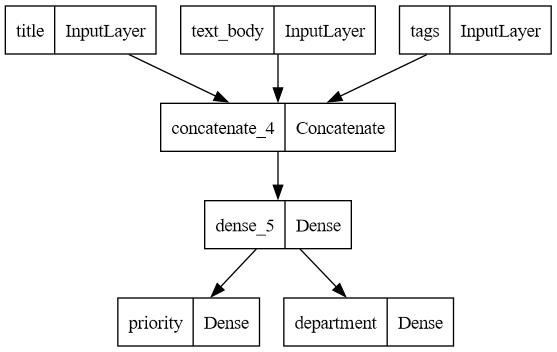

In [16]:
keras.utils.plot_model(model, 'ticket_classifier.png')

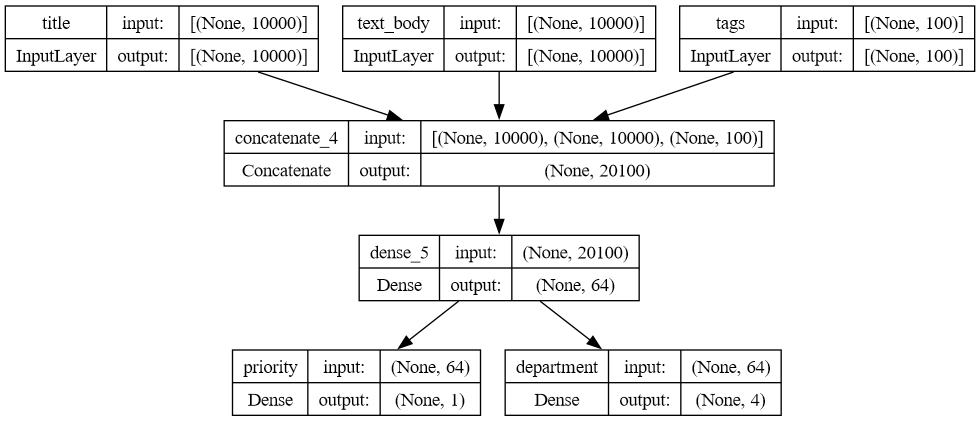

In [17]:
keras.utils.plot_model(model, 'ticket_classifier_with_shape_info.png', show_shapes=True)
# None表示批量大小，意味着可以接收任意大小的批量

In [18]:
model.layers

In [19]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [20]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate_4')>

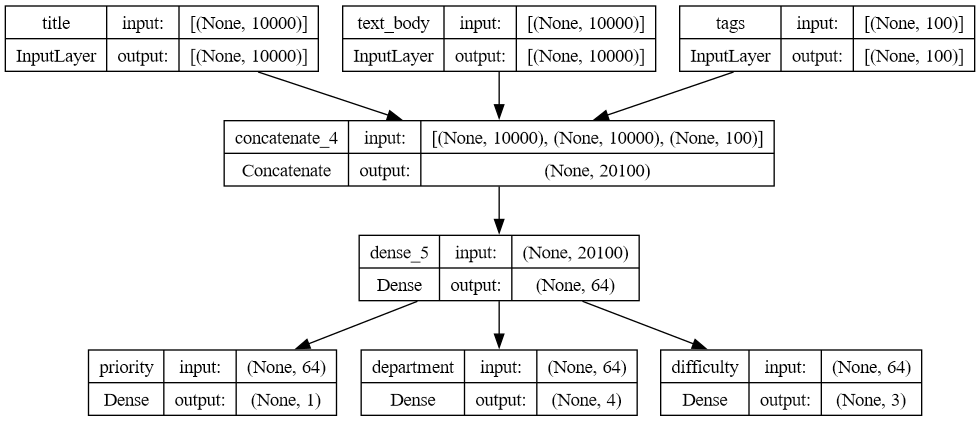

In [22]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation='softmax', name='difficulty')(features)
new_model = keras.Model(inputs=[title, text_body, tags],
                        outputs=[priority, department, difficulty])
keras.utils.plot_model(new_model, 'udpated_ticket_classifier.png', show_shapes=True)

## 模型子类化

In [23]:
# 子类化模型
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation='relu')
        self.priority_scorer = layers.Dense(1, activation='sigmoid')
        self.department_classifier = layers.Dense(num_departments, activation='softmax')
    
    def call(self, inputs):
        title = inputs['title']
        text_body = inputs['text_body']
        tags = inputs['tags']

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [24]:
model = CustomerTicketModel(num_departments=4)
priority, department = model({
    "title": title_data,
    "text_body": text_body_data,
    "tags": tags_data
})

In [ ]:
# 编译和训练
model.compile(optimizer='rmsprop',
              loss=['mean_squared_error', 'categorical_crossentropy'],
              metrics=[['mean_absolute_error'], ['accuracy']])
model.fit({'title': title_data, 'text_body': text_body_data, 'tags': tags_data},
          [priority_data, department_data], 
          epochs=1)
model.evaluate({'title': title_data, 'text_body': text_body_data, 'tags': tags_data},
                [priority_data, department_data])
priority_preds, department_preds = model.predict({'title': title_data, 
                                                  'text_body': text_body_data,
                                                  'tags': tags_data})

## 混合使用不同的组件

In [25]:
# 一个包含子类化模型的函数式模型
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_utils = 1
            activation = 'sigmoid'
        else:
            num_utils = num_classes
            activation = 'softmax'
        self.dense = layers.Dense(num_utils, activation=activation)
    
    def call(self, inputs):
        return self.dense(inputs)
    
inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation='relu')(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [27]:
# 一个包含函数时模型的子类化模型
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation='sigmoid')(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):
    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation='relu')
        self.classifier = binary_classifier
    
    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

## 内置的训练循环和评估循环

In [31]:
# 标准工作流程
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation='relu')(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation='softmax')(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=3, validation_data=[val_images, val_labels])
test_metrics = model.evaluate(test_images, test_labels)
print(test_metrics)
predictions = model.predict(test_images)
print(predictions)

Epoch 1/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2914 - accuracy: 0.9139 - val_loss: 0.1513 - val_accuracy: 0.9582
Epoch 2/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1641 - accuracy: 0.9535 - val_loss: 0.1272 - val_accuracy: 0.9655
Epoch 3/3
313/313 [==============================] - 0s 923us/step - loss: 0.1063 - accuracy: 0.9723
[0.1063155010342598, 0.9722999930381775]
313/313 [==============================] - 0s 481us/step
[[6.44088678e-13 1.21922049e-15 1.51415436e-09 ... 1.00000000e+00
  6.59557749e-13 2.78420065e-10]
 [5.02565762e-13 7.90626661e-11 1.00000000e+00 ... 1.61939783e-25
  4.24559693e-12 7.83002612e-27]
 [3.79639165e-09 9.99962568e-01 1.15381536e-05 ... 1.22214024e-05
  1.01330388e-05 1.05756826e-07]
 ...
 [1.23897805e-14 6.07961459e-10 4.57279249e-11 ... 8.82619190e-07
  1.29911754e-07 6.05287387e-05]
 [1.23666322e-09 2.01343196e-11 1.44050692e-13 ... 1.72321369e-12
  1.92116545e-06 9.49208499e-14]
 [1.89584980e-1

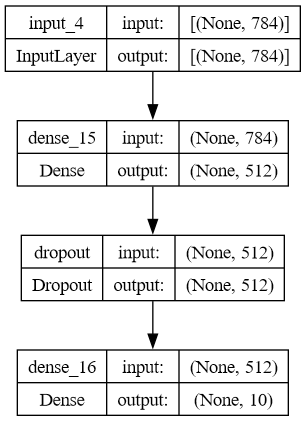

In [32]:
keras.utils.plot_model(model, show_shapes=True)

In [38]:
# 自定义指标：衡量均方根误差（RMSE）
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):
    def __init__(self, name='rmse', **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name='mse_sum',initializer='zeros')
        self.total_samples = self.add_weight(name='total_samples', initializer='zeros', dtype='int32')
    
    def update_state(self, y_true, y_pred,sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))
    
    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', RootMeanSquaredError()])
model.fit(train_images, train_labels, epochs=3, validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
print(test_metrics)

Epoch 1/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2955 - accuracy: 0.9138 - rmse: 7.1825 - val_loss: 0.1634 - val_accuracy: 0.9522 - val_rmse: 7.3599
Epoch 2/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1675 - accuracy: 0.9535 - rmse: 7.3533 - val_loss: 0.1312 - val_accuracy: 0.9659 - val_rmse: 7.4085
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.1059 - accuracy: 0.9726 - rmse: 7.4367
[0.10592005401849747, 0.972599983215332, 7.436737537384033]


In [39]:
# 回调函数
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=2
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='checkpoint_path.keras',
        monitor='val_loss',
        save_best_only=True
    )
]
model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2932 - accuracy: 0.9126 - val_loss: 0.1617 - val_accuracy: 0.9537
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1632 - accuracy: 0.9545 - val_loss: 0.1260 - val_accuracy: 0.9666
Epoch 3/10
1563/1563 [==============================] - 2s 2ms/step - loss: 0.1378 - accuracy: 0.9638 - val_loss: 0.1188 - val_accuracy: 0.9708
Epoch 4/10
1563/1563 [==============================] - 2s 2ms/step - loss: 0.1242 - accuracy: 0.9684 - val_loss: 0.1035 - val_accuracy: 0.9738
Epoch 5/10
1563/1563 [==============================] - 2s 2ms/step - loss: 0.1182 - accuracy: 0.9707 - val_loss: 0.1097 - val_accuracy: 0.9739
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1069 - accuracy: 0.9735 - val_loss: 0.1048 - val_accuracy: 0.9763
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1032 - accuracy: 0.9752 - val_loss: 0.1069 - val_accuracy:

In [40]:
model = keras.models.load_model('checkpoint_path.keras')

In [43]:
# 自定义回调函数：保存每个批量损失值
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []
    
    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get('loss'))
    
    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel('Loss')
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2930 - accuracy: 0.9136 - val_loss: 0.1460 - val_accuracy: 0.9570
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1660 - accuracy: 0.9533 - val_loss: 0.1245 - val_accuracy: 0.9645
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1381 - accuracy: 0.9634 - val_loss: 0.1232 - val_accuracy: 0.9680
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1260 - accuracy: 0.9672 - val_loss: 0.1052 - val_accuracy: 0.9734
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1163 - accuracy: 0.9707 - val_loss: 0.1120 - val_accuracy: 0.9733
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1118 - accuracy: 0.9722 - val_loss: 0.1077 - val_accuracy: 0.9751
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1036 - accuracy: 0.9746 - val_loss: 0.1084 - val_accuracy:

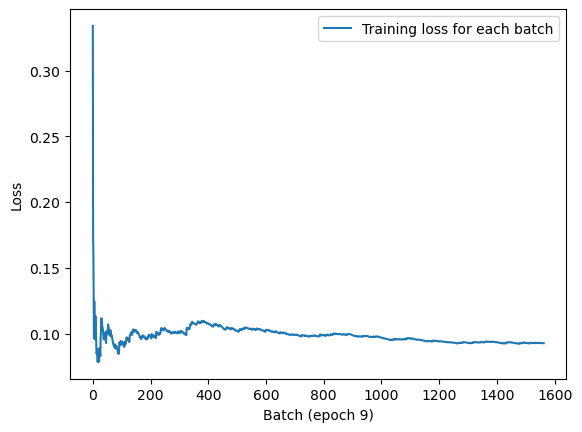

In [44]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",               
              loss="sparse_categorical_crossentropy",               
              metrics=["accuracy"]) 
model.fit(train_images, train_labels,           
          epochs=10,           
          callbacks=[LossHistory()],           
          validation_data=(val_images, val_labels))

In [46]:
# TensorBoard
model = get_mnist_model() 
model.compile(optimizer="rmsprop",               
              loss="sparse_categorical_crossentropy",               
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(
    log_dir = 'tensorboard_logs'
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2951 - accuracy: 0.9120 - val_loss: 0.1486 - val_accuracy: 0.9573
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1659 - accuracy: 0.9534 - val_loss: 0.1276 - val_accuracy: 0.9648
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1400 - accuracy: 0.9622 - val_loss: 0.1095 - val_accuracy: 0.9721
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1258 - accuracy: 0.9671 - val_loss: 0.1124 - val_accuracy: 0.9740
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1184 - accuracy: 0.9705 - val_loss: 0.1110 - val_accuracy: 0.9755
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1092 - accuracy: 0.9732 - val_loss: 0.1147 - val_accuracy: 0.9751
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1030 - accuracy: 0.9755 - val_loss: 0.1186 - val_accuracy:

In [48]:
%tensorboard --logdir tensorboard_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
